In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#appkey = "l5LvYmLeHSQD3TprnslT8caUL"
url = "https://data.ny.gov/resource/8vkr-v8vh.json"

In [4]:
query = (url)
raw_data = pd.read_json(query)
raw_data.head()


,draw_date,multiplier,winning_numbers
0,2017-08-19T00:00:00.000,4.0,17 19 39 43 68 13
1,2017-08-16T00:00:00.000,3.0,09 15 43 60 64 04
2,2017-08-12T00:00:00.000,2.0,20 24 26 35 49 19
3,2017-08-09T00:00:00.000,4.0,12 30 36 47 62 09
4,2017-08-05T00:00:00.000,2.0,11 21 28 33 45 11


In [5]:
for idx,row in raw_data.iterrows():
    raw_data.set_value(idx, "draw_date", pd.to_datetime(row["draw_date"]))
    numbers = row["winning_numbers"].split(" ")
    for bidx, number in enumerate(numbers):
        btext = 'ball' + str(bidx + 1)
        raw_data.set_value(idx, btext, int(number))
raw_data.head(20)

,draw_date,multiplier,winning_numbers,ball1,ball2,ball3,ball4,ball5,ball6
0,2017-08-19 00:00:00,4.0,17 19 39 43 68 13,17.0,19.0,39.0,43.0,68.0,13.0
1,2017-08-16 00:00:00,3.0,09 15 43 60 64 04,9.0,15.0,43.0,60.0,64.0,4.0
2,2017-08-12 00:00:00,2.0,20 24 26 35 49 19,20.0,24.0,26.0,35.0,49.0,19.0
3,2017-08-09 00:00:00,4.0,12 30 36 47 62 09,12.0,30.0,36.0,47.0,62.0,9.0
4,2017-08-05 00:00:00,2.0,11 21 28 33 45 11,11.0,21.0,28.0,33.0,45.0,11.0
5,2017-08-02 00:00:00,3.0,01 16 54 63 69 18,1.0,16.0,54.0,63.0,69.0,18.0
6,2017-07-29 00:00:00,2.0,01 28 40 45 48 12,1.0,28.0,40.0,45.0,48.0,12.0
7,2017-07-26 00:00:00,2.0,07 19 21 42 69 12,7.0,19.0,21.0,42.0,69.0,12.0
8,2017-07-22 00:00:00,3.0,05 32 44 53 60 09,5.0,32.0,44.0,53.0,60.0,9.0
9,2017-07-19 00:00:00,5.0,50 51 59 61 63 04,50.0,51.0,59.0,61.0,63.0,4.0


In [6]:
#Since October 7, 2015, the game has used a 5/69 (white balls) + 1/26 (Powerballs) matrix 
filter_date =  pd.to_datetime('10/07/2015')
powerball = raw_data.loc[raw_data["draw_date"] >= filter_date, ["draw_date", "ball1", "ball2", "ball3", "ball4", "ball5","ball6"]]
powerball

,draw_date,ball1,ball2,ball3,ball4,ball5,ball6
0,2017-08-19 00:00:00,17.0,19.0,39.0,43.0,68.0,13.0
1,2017-08-16 00:00:00,9.0,15.0,43.0,60.0,64.0,4.0
2,2017-08-12 00:00:00,20.0,24.0,26.0,35.0,49.0,19.0
3,2017-08-09 00:00:00,12.0,30.0,36.0,47.0,62.0,9.0
4,2017-08-05 00:00:00,11.0,21.0,28.0,33.0,45.0,11.0
5,2017-08-02 00:00:00,1.0,16.0,54.0,63.0,69.0,18.0
6,2017-07-29 00:00:00,1.0,28.0,40.0,45.0,48.0,12.0
7,2017-07-26 00:00:00,7.0,19.0,21.0,42.0,69.0,12.0
8,2017-07-22 00:00:00,5.0,32.0,44.0,53.0,60.0,9.0
9,2017-07-19 00:00:00,50.0,51.0,59.0,61.0,63.0,4.0


In [7]:
filter_stdate_2015 =  pd.to_datetime('01/01/2015')
filter_enddate_2015 = pd.to_datetime('12/31/2015')
powerball_2015 = raw_data.loc[(raw_data["draw_date"] >= filter_stdate_2015) & (raw_data["draw_date"] <= filter_enddate_2015), ["draw_date", "ball1", "ball2", "ball3", "ball4", "ball5","ball6"]]
powerball_2015

,draw_date,ball1,ball2,ball3,ball4,ball5,ball6
171,2015-12-30 00:00:00,12.0,36.0,38.0,54.0,61.0,22.0
172,2015-12-26 00:00:00,27.0,40.0,44.0,59.0,65.0,20.0
173,2015-12-23 00:00:00,16.0,38.0,55.0,63.0,67.0,25.0
174,2015-12-19 00:00:00,28.0,30.0,41.0,59.0,68.0,10.0
175,2015-12-16 00:00:00,9.0,10.0,32.0,42.0,55.0,6.0
176,2015-12-12 00:00:00,2.0,14.0,19.0,30.0,62.0,22.0
177,2015-12-09 00:00:00,7.0,10.0,16.0,46.0,56.0,1.0
178,2015-12-05 00:00:00,13.0,27.0,33.0,47.0,68.0,13.0
179,2015-12-02 00:00:00,14.0,18.0,19.0,32.0,64.0,9.0
180,2015-11-28 00:00:00,2.0,6.0,47.0,66.0,67.0,2.0


In [8]:
filter_stdate_2016 =  pd.to_datetime('01/01/2016')
filter_enddate_2016 = pd.to_datetime('12/31/2016')
powerball_2016 = raw_data.loc[(raw_data["draw_date"] >= filter_stdate_2016) & (raw_data["draw_date"] <= filter_enddate_2016), ["draw_date", "ball1", "ball2", "ball3", "ball4", "ball5","ball6"]]
powerball_2016

,draw_date,ball1,ball2,ball3,ball4,ball5,ball6
66,2016-12-31 00:00:00,1.0,3.0,28.0,57.0,67.0,9.0
67,2016-12-28 00:00:00,16.0,23.0,30.0,44.0,58.0,4.0
68,2016-12-24 00:00:00,28.0,38.0,42.0,51.0,52.0,21.0
69,2016-12-21 00:00:00,25.0,33.0,40.0,54.0,68.0,3.0
70,2016-12-17 00:00:00,1.0,8.0,16.0,40.0,48.0,10.0
71,2016-12-14 00:00:00,18.0,26.0,37.0,39.0,66.0,15.0
72,2016-12-10 00:00:00,12.0,21.0,32.0,44.0,66.0,15.0
73,2016-12-07 00:00:00,41.0,48.0,49.0,53.0,64.0,20.0
74,2016-12-03 00:00:00,8.0,10.0,26.0,27.0,33.0,22.0
75,2016-11-30 00:00:00,3.0,14.0,18.0,25.0,45.0,7.0


In [9]:
filter_stdate_2017 = pd.to_datetime('01/01/2017')
filter_enddate_2017 = pd.to_datetime('12/31/2017')
powerball_2017 = raw_data.loc[(raw_data["draw_date"] >= filter_stdate_2017) & (raw_data["draw_date"] <= filter_enddate_2017), ["draw_date", "ball1", "ball2", "ball3", "ball4", "ball5","ball6"]]
powerball_2017

,draw_date,ball1,ball2,ball3,ball4,ball5,ball6
0,2017-08-19 00:00:00,17.0,19.0,39.0,43.0,68.0,13.0
1,2017-08-16 00:00:00,9.0,15.0,43.0,60.0,64.0,4.0
2,2017-08-12 00:00:00,20.0,24.0,26.0,35.0,49.0,19.0
3,2017-08-09 00:00:00,12.0,30.0,36.0,47.0,62.0,9.0
4,2017-08-05 00:00:00,11.0,21.0,28.0,33.0,45.0,11.0
5,2017-08-02 00:00:00,1.0,16.0,54.0,63.0,69.0,18.0
6,2017-07-29 00:00:00,1.0,28.0,40.0,45.0,48.0,12.0
7,2017-07-26 00:00:00,7.0,19.0,21.0,42.0,69.0,12.0
8,2017-07-22 00:00:00,5.0,32.0,44.0,53.0,60.0,9.0
9,2017-07-19 00:00:00,50.0,51.0,59.0,61.0,63.0,4.0


In [10]:
ball1 = powerball["ball1"].value_counts()
ball2 = powerball["ball2"].value_counts()
ball3 = powerball["ball3"].value_counts()
ball4 = powerball["ball4"].value_counts()
ball5 = powerball["ball5"].value_counts()
ball6 = powerball["ball6"].value_counts()

ball1_2015 = powerball_2015["ball1"].value_counts()
ball2_2015 = powerball_2015["ball2"].value_counts()
ball3_2015 = powerball_2015["ball3"].value_counts()
ball4_2015 = powerball_2015["ball4"].value_counts()
ball5_2015 = powerball_2015["ball5"].value_counts()
ball6_2015 = powerball_2015["ball6"].value_counts()

ball1_2016 = powerball_2016["ball1"].value_counts()
ball2_2016 = powerball_2016["ball2"].value_counts()
ball3_2016 = powerball_2016["ball3"].value_counts()
ball4_2016 = powerball_2016["ball4"].value_counts()
ball5_2016 = powerball_2016["ball5"].value_counts()
ball6_2016 = powerball_2016["ball6"].value_counts()

ball1_2017 = powerball_2017["ball1"].value_counts()
ball2_2017 = powerball_2017["ball2"].value_counts()
ball3_2017 = powerball_2017["ball3"].value_counts()
ball4_2017 = powerball_2017["ball4"].value_counts()
ball5_2017 = powerball_2017["ball5"].value_counts()
ball6_2017 = powerball_2017["ball6"].value_counts()



In [11]:
def plotBall(ball_series, title, x_label):
    ball_xaxis = range(len(ball_series.index))
    ball_yaxis = ball_series
    tick_locations = [value + 0.1 for value in ball_xaxis]

    fig = plt.figure( figsize=(20,7.5))
    ax = fig.add_subplot(111)

    ax.bar(ball_xaxis, ball_yaxis, alpha=0.75, width=0.5)
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(ball_series.index, rotation=90)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Frequency")
    
    plt.show()

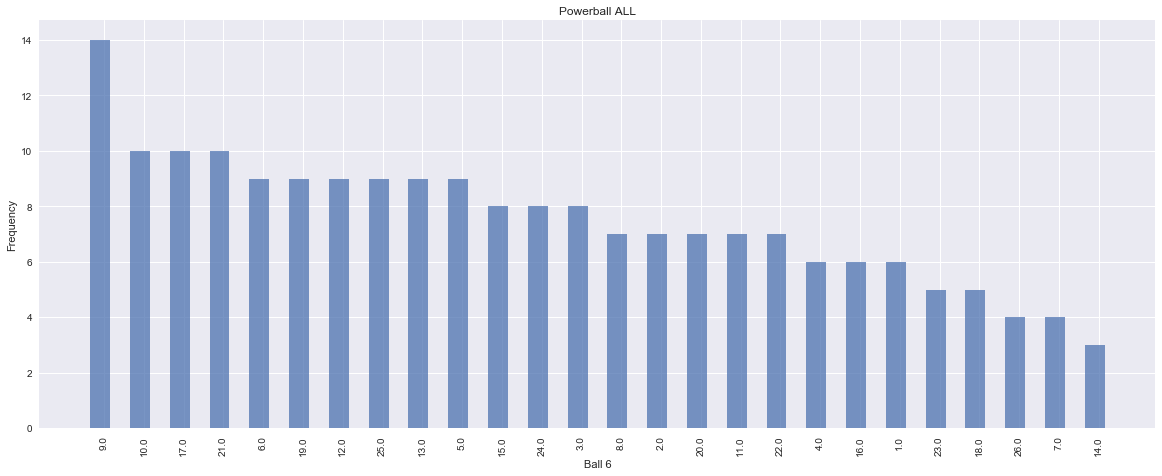

In [12]:
plotBall(ball6, "Powerball ALL", "Ball 6")

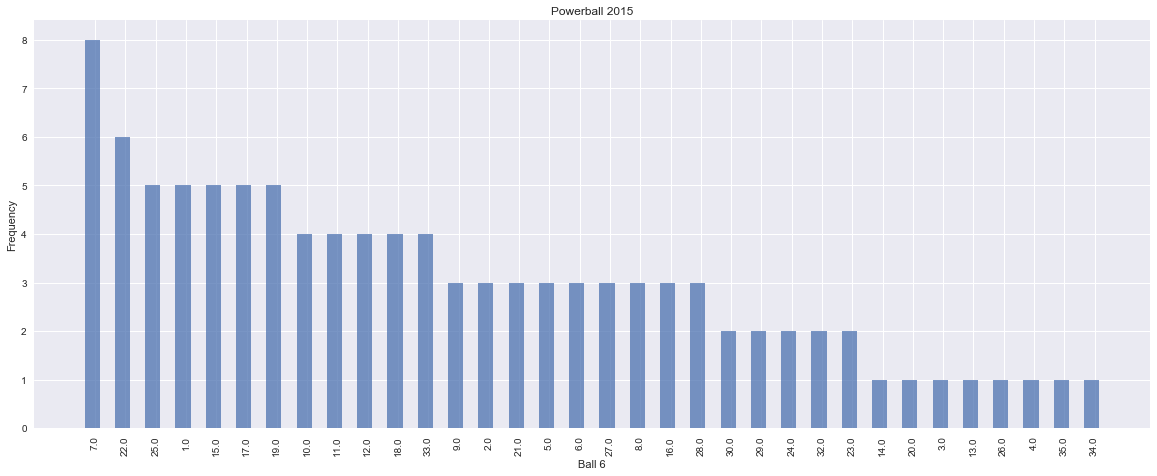

In [13]:
plotBall(ball6_2015, "Powerball 2015", "Ball 6")

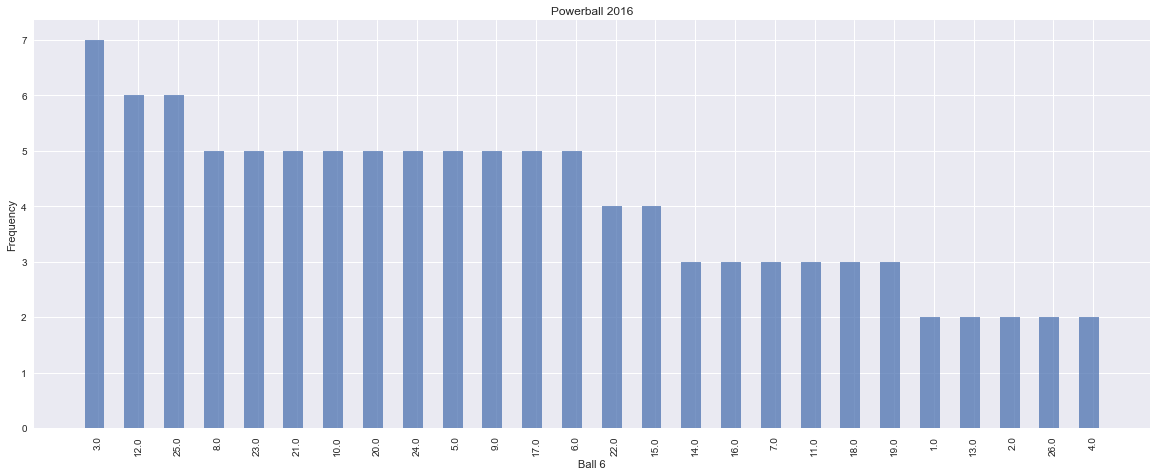

In [14]:
plotBall(ball6_2016, "Powerball 2016", "Ball 6")

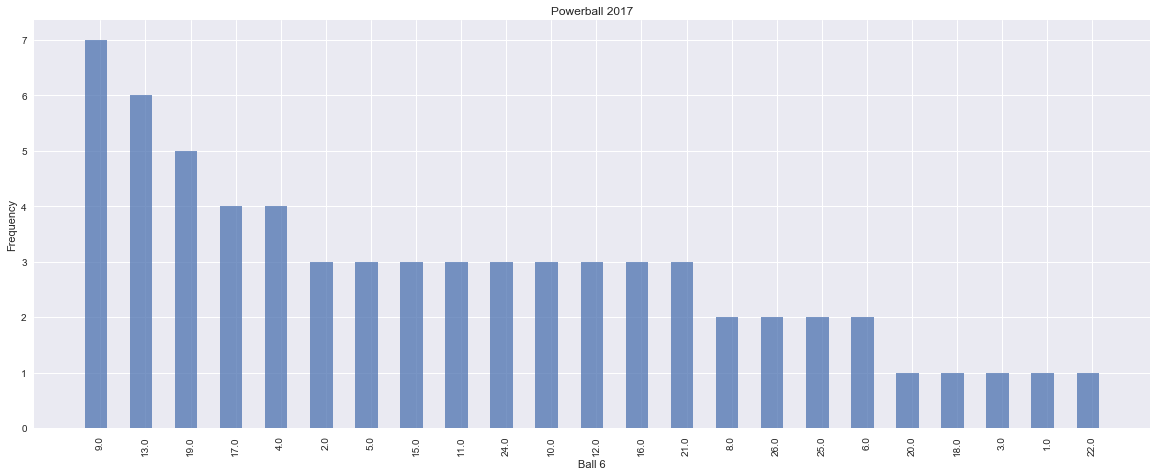

In [15]:
plotBall(ball6_2017, "Powerball 2017", "Ball 6")

In [16]:
test1 = raw_data.loc[:,["draw_date","ball1"]]
test1.columns = ["draw_date","ball"]
test2 = raw_data.loc[:,["draw_date","ball2"]]
test2.columns = ["draw_date","ball"]
test3 = raw_data.loc[:,["draw_date","ball3"]]
test3.columns = ["draw_date","ball"]
test4 = raw_data.loc[:,["draw_date","ball4"]]
test4.columns = ["draw_date","ball"]
test5 = raw_data.loc[:,["draw_date","ball5"]]
test5.columns = ["draw_date","ball"]

balls = pd.concat([test1, test2, test3, test4, test5])
balls.head()

,draw_date,ball
0,2017-08-19 00:00:00,17.0
1,2017-08-16 00:00:00,9.0
2,2017-08-12 00:00:00,20.0
3,2017-08-09 00:00:00,12.0
4,2017-08-05 00:00:00,11.0


In [17]:
regball = balls.loc[raw_data["draw_date"] >= filter_date]
regball

,draw_date,ball
0,2017-08-19 00:00:00,17.0
1,2017-08-16 00:00:00,9.0
2,2017-08-12 00:00:00,20.0
3,2017-08-09 00:00:00,12.0
4,2017-08-05 00:00:00,11.0
5,2017-08-02 00:00:00,1.0
6,2017-07-29 00:00:00,1.0
7,2017-07-26 00:00:00,7.0
8,2017-07-22 00:00:00,5.0
9,2017-07-19 00:00:00,50.0


In [18]:
regball_2015 = regball.loc[(raw_data["draw_date"] >= filter_stdate_2015) & (raw_data["draw_date"] <= filter_enddate_2015)]
regball_2015

,draw_date,ball
171,2015-12-30 00:00:00,12.0
172,2015-12-26 00:00:00,27.0
173,2015-12-23 00:00:00,16.0
174,2015-12-19 00:00:00,28.0
175,2015-12-16 00:00:00,9.0
176,2015-12-12 00:00:00,2.0
177,2015-12-09 00:00:00,7.0
178,2015-12-05 00:00:00,13.0
179,2015-12-02 00:00:00,14.0
180,2015-11-28 00:00:00,2.0


In [19]:
regball_2016 = regball.loc[(raw_data["draw_date"] >= filter_stdate_2016) & (raw_data["draw_date"] <= filter_enddate_2016)]
regball_2016

,draw_date,ball
66,2016-12-31 00:00:00,1.0
67,2016-12-28 00:00:00,16.0
68,2016-12-24 00:00:00,28.0
69,2016-12-21 00:00:00,25.0
70,2016-12-17 00:00:00,1.0
71,2016-12-14 00:00:00,18.0
72,2016-12-10 00:00:00,12.0
73,2016-12-07 00:00:00,41.0
74,2016-12-03 00:00:00,8.0
75,2016-11-30 00:00:00,3.0


In [20]:
regball_2017 = regball.loc[(raw_data["draw_date"] >= filter_stdate_2017) & (raw_data["draw_date"] <= filter_enddate_2017)]
regball_2017

,draw_date,ball
0,2017-08-19 00:00:00,17.0
1,2017-08-16 00:00:00,9.0
2,2017-08-12 00:00:00,20.0
3,2017-08-09 00:00:00,12.0
4,2017-08-05 00:00:00,11.0
5,2017-08-02 00:00:00,1.0
6,2017-07-29 00:00:00,1.0
7,2017-07-26 00:00:00,7.0
8,2017-07-22 00:00:00,5.0
9,2017-07-19 00:00:00,50.0


In [21]:
allball = regball["ball"].value_counts()
ball_2015 = regball_2015["ball"].value_counts()
ball_2016 = regball_2016["ball"].value_counts()
ball_2017 = regball_2017["ball"].value_counts()

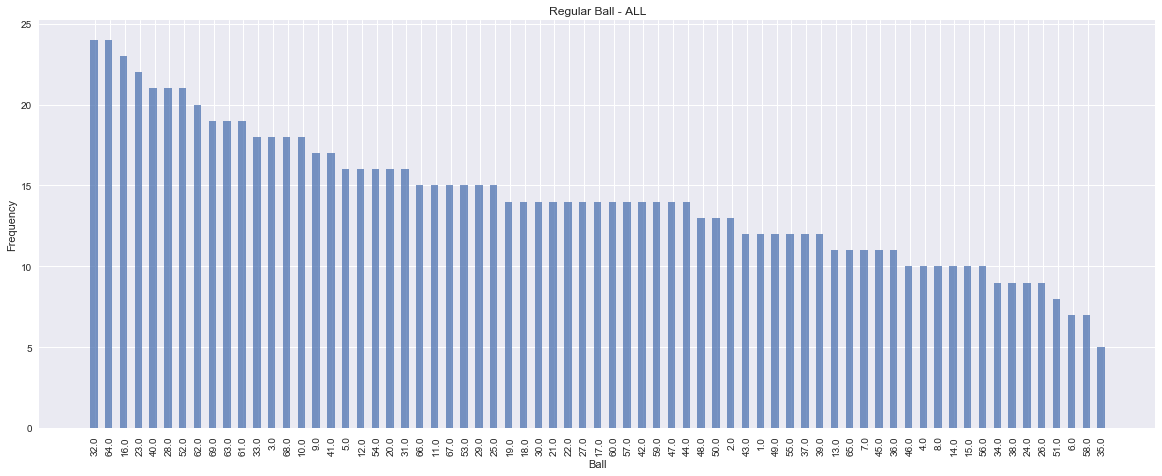

In [22]:
plotBall(allball, "Regular Ball - ALL", "Ball")

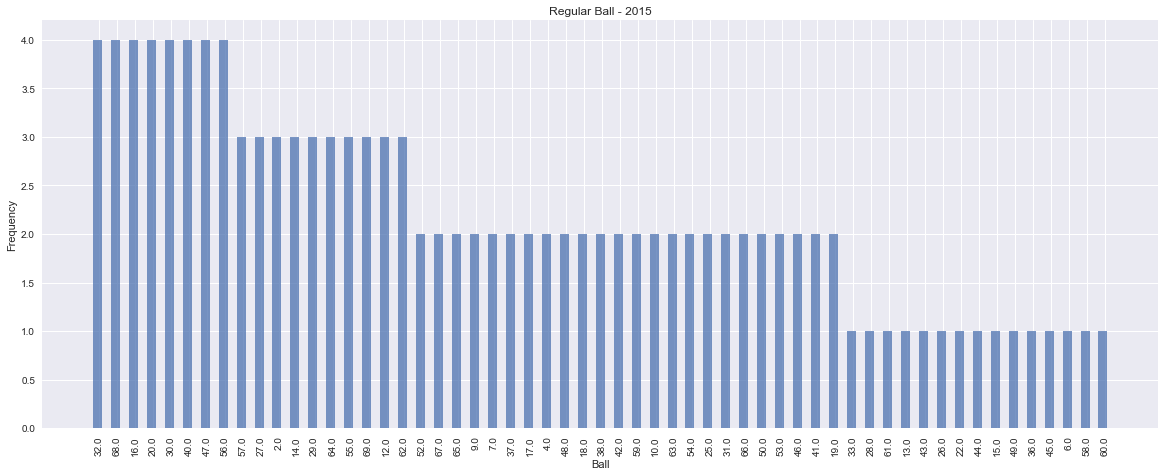

In [23]:
plotBall(ball_2015, "Regular Ball - 2015", "Ball")

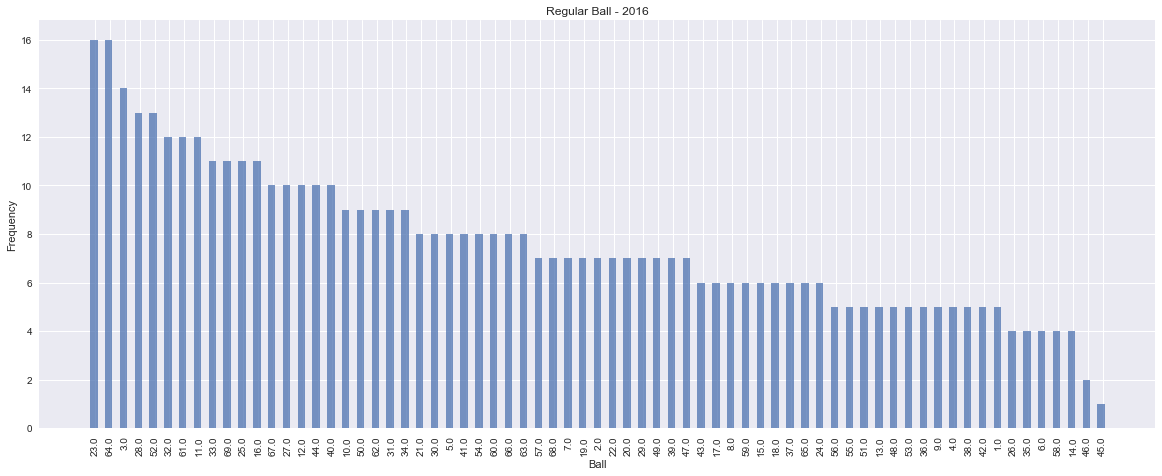

In [24]:
plotBall(ball_2016, "Regular Ball - 2016", "Ball")

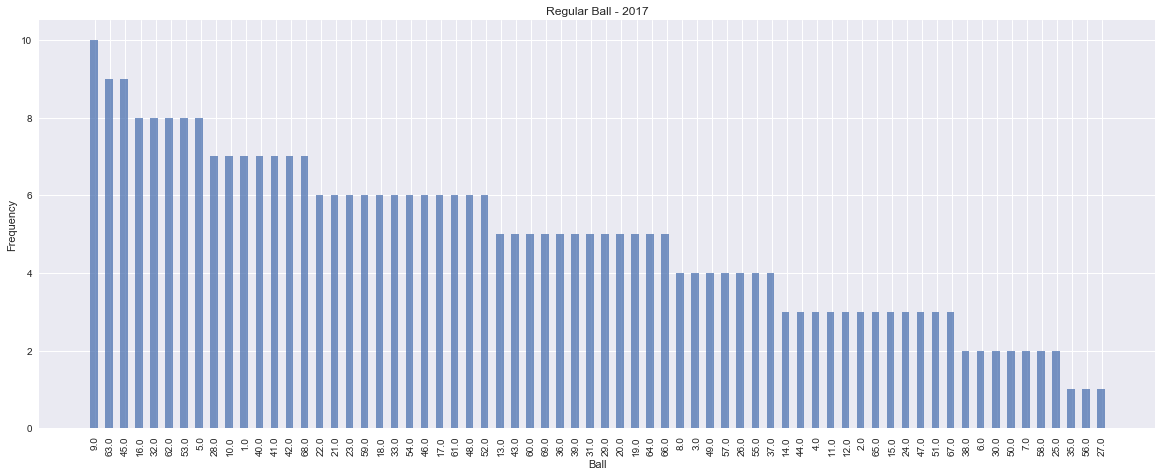

In [25]:
plotBall(ball_2017, "Regular Ball - 2017", "Ball")

In [26]:

allball_df = pd.DataFrame({"ball":allball.index,"count":allball})
allball_df.sort_values(by=["ball"], inplace=True)
allball_df.reset_index(inplace=True,drop=True)
allball_df
ball2015_df = pd.DataFrame({"ball":ball_2015.index,"count":ball_2015})
ball2015_df.sort_values(by=["ball"], inplace=True)
ball2015_df.reset_index(inplace=True,drop=True)
ball2015_df
ball2016_df = pd.DataFrame({"ball":ball_2016.index,"count":ball_2016})
ball2016_df.sort_values(by=["ball"], inplace=True)
ball2016_df.reset_index(inplace=True,drop=True)
ball2016_df
ball2017_df = pd.DataFrame({"ball":ball_2017.index,"count":ball_2017})
ball2017_df.sort_values(by=["ball"], inplace=True)
ball2017_df.reset_index(inplace=True,drop=True)
ball2017_df

,ball,count
0,1.0,7
1,2.0,3
2,3.0,4
3,4.0,3
4,5.0,8
5,6.0,2
6,7.0,2
7,8.0,4
8,9.0,10
9,10.0,7


In [27]:
ball_df = allball_df.merge(ball2015_df, how="left", on="ball", suffixes=("all","2015")).merge(ball2016_df,how="left",on="ball").merge(ball2017_df,how="left",on="ball", suffixes=("2016","2017"))
ball_df

,ball,countall,count2015,count2016,count2017
0,1.0,12,NaN,5,7.0
1,2.0,13,3.0,7,3.0
2,3.0,18,NaN,14,4.0
3,4.0,10,2.0,5,3.0
4,5.0,16,NaN,8,8.0
5,6.0,7,1.0,4,2.0
6,7.0,11,2.0,7,2.0
7,8.0,10,NaN,6,4.0
8,9.0,17,2.0,5,10.0
9,10.0,18,2.0,9,7.0


In [28]:
ball_df1 = ball_df[:35]
ball_df1

,ball,countall,count2015,count2016,count2017
0,1.0,12,NaN,5,7.0
1,2.0,13,3.0,7,3.0
2,3.0,18,NaN,14,4.0
3,4.0,10,2.0,5,3.0
4,5.0,16,NaN,8,8.0
5,6.0,7,1.0,4,2.0
6,7.0,11,2.0,7,2.0
7,8.0,10,NaN,6,4.0
8,9.0,17,2.0,5,10.0
9,10.0,18,2.0,9,7.0


In [29]:
ball_df2 = ball_df[35:]
ball_df2

,ball,countall,count2015,count2016,count2017
35,36.0,11,1.0,5,5.0
36,37.0,12,2.0,6,4.0
37,38.0,9,2.0,5,2.0
38,39.0,12,NaN,7,5.0
39,40.0,21,4.0,10,7.0
40,41.0,17,2.0,8,7.0
41,42.0,14,2.0,5,7.0
42,43.0,12,1.0,6,5.0
43,44.0,14,1.0,10,3.0
44,45.0,11,1.0,1,9.0


In [38]:
def plotMultiYear(ball_df):
    ball_xaxis = np.arange(len(ball_df.index))
    tick_locations = [value + 0.1 for value in ball_xaxis]

    fig = plt.figure( figsize=(20, 7.5))
    ax = fig.add_subplot(111)

    ax.bar(ball_xaxis - 0.00 , ball_df["count2015"], color="b", alpha=0.75, width=0.25, label = "2015")
    ax.bar(ball_xaxis + 0.25 , ball_df["count2016"], color="g", alpha=0.75, width=0.25, label = "2016")
    ax.bar(ball_xaxis + 0.50, ball_df["count2017"], color="r", alpha=0.75, width=0.25, label = "2017")

    ax.set_xticks(tick_locations)
    ax.set_xticklabels(ball_df["ball"], rotation=90)
    ax.set_title("Frequency of Regular Balls")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Ball Number")
    ax.legend()
    sns.set()
    plt.show()

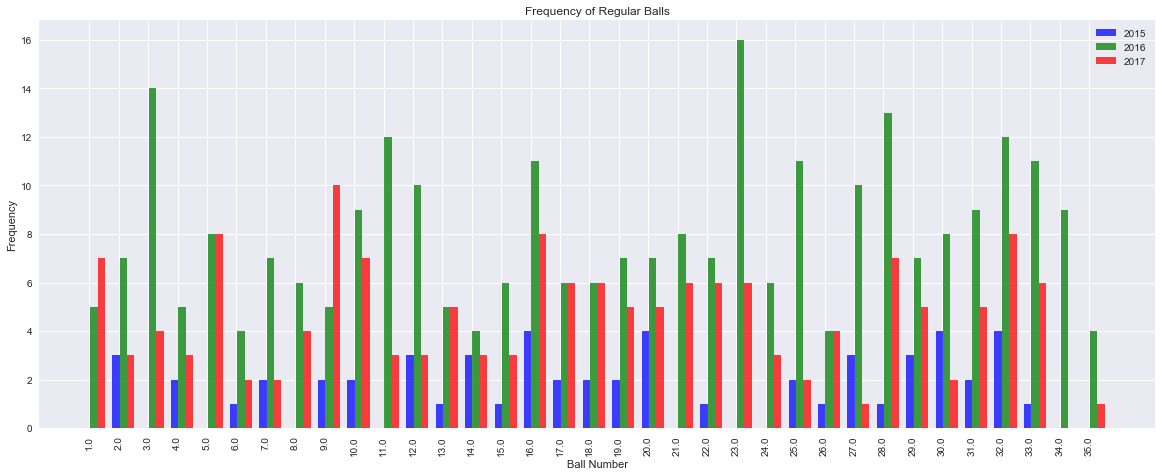

In [39]:
plotMultiYear(ball_df1)

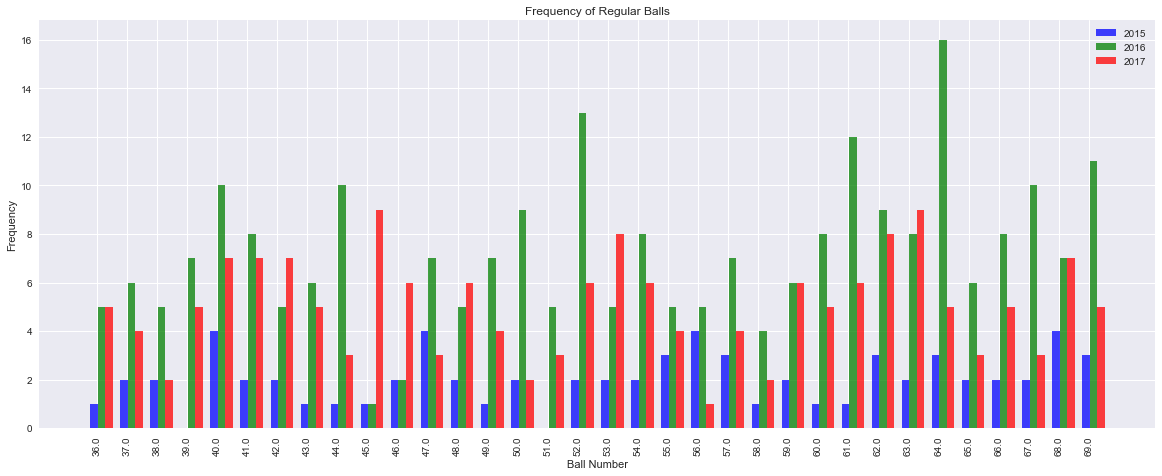

In [40]:
plotMultiYear(ball_df2)